DATA620: Web Analytics Week 4
Omar Pineda
Fall 2019

For your first project, you are asked to

1.  Identify and load a network dataset that has some categorical information available for each node.
2.  For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3.  Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.html], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

You may work in a small group.  Your project should be delivered in an Jupyter Notebook, and posted in GitHub.  Your project is due end of day Monday 9/30. You and your team should created a video presentation about your project. You should be ready to present your project in our Meet-up on Wednesday, 10/2.


1. Identify and load a network dataset.

For this project we'll be using a dataset of books on US politics sold on Amazon.com. According to the source, "edges represent frequent co-purchasing of books by the same buyers, as indicated by the 'customers who bought this book also bought these other books' feature on Amazon. Nodes have been given values 'l', 'n', or 'c' to indicate whether they are 'liberal', 'neutral', or 'conservative'."

Source: http://www-personal.umich.edu/~mejn/netdata/

In [5]:
#Load libraries
import matplotlib.pyplot as plt
import networkx as nx

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


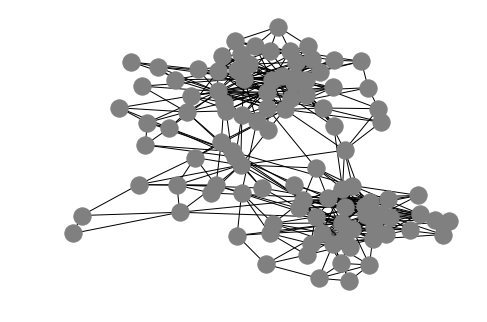

In [4]:
pol = nx.read_gml('polbooks.gml')
nx.draw(pol, with_labels=False, font_weight='bold', node_color = 'grey')
list(pol.nodes.data())
print(nx.info(pol))

2.  For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.

First we calculate the degree centrality for each of the nodes, meaning the number of connections that a node has. In this dataset, degree centrality means how many books a given book is often co-purchased with by the same buyers. 'A National Party No more' and 'Off with Their Heads' are both co-purchased with 25 other political books, so they seem to be the most popular. 'The Future of Freedom' is the least popular in this sphere as it is only co-purchased with 2 other political books. Here we have a sorted list of books by their degree centrality.

In [6]:
deg = dict(nx.degree(pol))
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
    return ms
dc = sorted_map(deg)
dc

[(u'A National Party No More', 25),
 (u'Off with Their Heads', 25),
 (u'Bushwhacked', 23),
 (u'Losing Bin Laden', 23),
 (u'American Dynasty', 22),
 (u'Big Lies', 21),
 (u'The Great Unraveling', 21),
 (u'The Price of Loyalty', 20),
 (u'Arrogance', 18),
 (u'Deliver Us from Evil', 18),
 (u'Legacy', 18),
 (u'Bush Country', 16),
 (u'The Lies of George W. Bush', 16),
 (u'Worse Than Watergate', 16),
 (u'Against All Enemies', 15),
 (u'Dereliction of Duty', 15),
 (u'Lies and the Lying Liars Who Tell Them', 14),
 (u'Persecution', 13),
 (u'Plan of Attack', 13),
 (u'Rise of the Vulcans', 13),
 (u"Dude, Where's My Country?", 12),
 (u'Thieves in High Places', 12),
 (u'House of Bush, House of Saud', 11),
 (u'Why America Slept', 11),
 (u'Let Freedom Ring', 10),
 (u'Ten Minutes from Normal', 10),
 (u'America Unbound', 9),
 (u'Endgame', 9),
 (u'Hating America', 9),
 (u"Rumsfeld's War", 9),
 (u'Spin Sisters', 9),
 (u'Tales from the Left Coast', 9),
 (u'The Politics of Truth', 9),
 (u'Useful Idiots', 9),


Next, we find the eigenvector centrality for each of our network's nodes. This centrality measure tells us how well connected a node's connections are, and in this example, 'Bushwhacked' is co-purchased with political books that are most often co-purchased with other books. Purchasing this book could be a gateway to purchasing a lot of these political books.

In [49]:
ec = dict(nx.eigenvector_centrality_numpy(pol))
ec2 = sorted_map(ec)
ec2

[(u'Bushwhacked', 0.29694645882847437),
 (u'Big Lies', 0.28413519498396617),
 (u'American Dynasty', 0.2708379662597635),
 (u'The Price of Loyalty', 0.2585939688672229),
 (u'The Great Unraveling', 0.254886026279208),
 (u'The Lies of George W. Bush', 0.24194952581413579),
 (u'Worse Than Watergate', 0.23759848283478227),
 (u'Plan of Attack', 0.19818504578342983),
 (u'Lies and the Lying Liars Who Tell Them', 0.18923558327806844),
 (u'Against All Enemies', 0.18672615228916736),
 (u'The Politics of Truth', 0.17824671627162583),
 (u'Thieves in High Places', 0.15757075564656936),
 (u"Dude, Where's My Country?", 0.15515766001317244),
 (u'House of Bush, House of Saud', 0.15198007447613732),
 (u'Bushwomen', 0.14783067465647967),
 (u'Fanatics and Fools', 0.14295247319279328),
 (u'Perfectly Legal', 0.11691115226737174),
 (u'The Exception to the Rulers', 0.113786059908816),
 (u'The Sorrows of Empire', 0.11174183388822785),
 (u'Had Enough?', 0.10366704374667271),
 (u'The Clinton Wars', 0.099546744856

3.  Compare your centrality measures across your categorical groups.

First we convert our book nodes and their centrality measures into data frames. This is the data frame with degree centrality:

In [38]:
import pandas as pd
deg_cat = pd.DataFrame.from_dict(deg, orient='index')
deg_cat.columns = ['degree_centrality'] #renaming a column
book_type = []
for x in deg:
    book_type.append(pol.nodes[x]['value']) #retrieve the corresponding node's attribute, meaning book type
deg_cat['type'] = book_type
deg_cat['book'] = list(deg_cat.index) #for later merging
deg_cat

,degree_centrality,type,book
The Bubble of American Supremacy,4,l,The Bubble of American Supremacy
Arrogance,18,c,Arrogance
"It's Still the Economy, Stupid!",7,l,"It's Still the Economy, Stupid!"
All the Shah's Men,3,n,All the Shah's Men
Weapons of Mass Deception,5,l,Weapons of Mass Deception
Perfectly Legal,6,l,Perfectly Legal
The Official Handbook Vast Right Wing Conspiracy,6,c,The Official Handbook Vast Right Wing Conspiracy
Against All Enemies,15,l,Against All Enemies
Give Me a Break,8,c,Give Me a Break
Hating America,9,c,Hating America


Data frame with eigenvector centrality:

In [42]:
ec_cat = pd.DataFrame.from_dict(ec, orient='index')
ec_cat.columns = ['eigenvector_centrality']
ec_cat['book'] = list(ec_cat.index) #for later merging
ec_cat

,eigenvector_centrality,book
Rush Limbaugh Is a Big Fat Idiot,0.026268,Rush Limbaugh Is a Big Fat Idiot
Persecution,0.051494,Persecution
Ghost Wars,0.056743,Ghost Wars
Charlie Wilson's War,0.011846,Charlie Wilson's War
The Bubble of American Supremacy,0.081377,The Bubble of American Supremacy
Worse Than Watergate,0.237598,Worse Than Watergate
Arrogance,0.065361,Arrogance
"It's Still the Economy, Stupid!",0.075322,"It's Still the Economy, Stupid!"
Dereliction of Duty,0.049669,Dereliction of Duty
Weapons of Mass Deception,0.074039,Weapons of Mass Deception


Then we join the two data frames into one master data frame:

In [50]:
master = pd.merge(deg_cat, ec_cat, on = 'book')
master

,degree_centrality,type,book,eigenvector_centrality
0,4,l,The Bubble of American Supremacy,0.081377
1,18,c,Arrogance,0.065361
2,7,l,"It's Still the Economy, Stupid!",0.075322
3,3,n,All the Shah's Men,0.047967
4,5,l,Weapons of Mass Deception,0.074039
5,6,l,Perfectly Legal,0.116911
6,6,c,The Official Handbook Vast Right Wing Conspiracy,0.033745
7,15,l,Against All Enemies,0.186726
8,8,c,Give Me a Break,0.039223
9,9,c,Hating America,0.048285


Looking at the degree centrality by political book category, we can see that liberal books have the highest degree centrality, closely followed by conservative books and then neutral books.

In [44]:
master.groupby(['type'])['degree_centrality'].mean().reset_index()

,type,degree_centrality
0,c,8.693878
1,l,8.837209
2,n,5.846154


Liberal books also tend to have the highest eigenvector centrality, followed by neutral books and then conservative books.

In [45]:
master.groupby(['type'])['eigenvector_centrality'].mean().reset_index()

,type,eigenvector_centrality
0,c,0.037308
1,l,0.117151
2,n,0.038171


Finally, we conduct t-tests to see if the differences in these centrality measures by type of political book are significant.

From a t-test of the degree centrality of liberal vs conservative books, our p-value is 0.904 > 0.05, so we fail to reject the null hypothesis and conclude that there is no significant difference between the degree centrality of these types of political books.

In [46]:
from scipy.stats import ttest_ind

cat1 = master[master['type']=='l']
cat2 = master[master['type']=='c']

ttest_ind(cat1['degree_centrality'], cat2['degree_centrality'])

Ttest_indResult(statistic=0.12112495863216903, pvalue=0.9038620786061254)

From a t-test of the eigenvector centrality of liberal vs conservative books, our p-value is 1.67e-09 < 0.05, so we reject the null hypothesis and conclude that there is a significant difference between the eigenvector centrality of these types of political books.

In [47]:
from scipy.stats import ttest_ind

ttest_ind(cat1['eigenvector_centrality'], cat2['eigenvector_centrality'])

Ttest_indResult(statistic=6.711036597989606, pvalue=1.6728745109248544e-09)